## Analyze Random Social Media Data- Capstone Project

### Key Objectives:

Increase client reach and engagement.

Gain valuable insights that will help improve social media performance.

Achieve their social media goals and provide data-driven recommendations.

`IMPORTANT: As the data is randomly generated, the key findings will vary every time the code is run because the Random module will generate random data every single time.` 

### Task 1 – Import required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

sns.set_theme()

### Task 2 – Generate random data for the social media data.

Now that you have the required imports, you need to generate some random tweet data to analyze. 
There are many ways to generate random data in Python, but some are more convenient than others. In 
this case, you may use `pandas date range` to choose a pseudo-random date within a range, the random 
module’s choice to create a choice from a list, and numpy’s random to create a random integer. 

First of all you need to define a list of categories for the social media experiment. The list may include 
the following, for example: 
Food, Travel, Fashion, Fitness, Music, Culture, Family, and Health 

In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health' ]
categories

['Food',
 'Travel',
 'Fashion',
 'Fitness',
 'Music',
 'Culture',
 'Family',
 'Health']

In [ ]:
data ={'Date': pd.date_range('2023-01-01', periods =500 ),
'Category': [random.choice(categories)for _ in range (500)],
'Likes': np.random.randint(0,10000, size =500),
'Comments': np.random.randint(0,1000, size =500),
'Shares': np.random.randint(0,500, size =500)}
data

### Task 3 – Load the data into a Pandas DataFrame and Explore the data.

In [4]:
df = pd.DataFrame(data)
df.head()

,Date,Category,Likes,Comments,Shares
0,2023-01-01,Music,1431,680,70
1,2023-01-02,Travel,485,425,277
2,2023-01-03,Music,8019,228,59
3,2023-01-04,Health,2886,763,41
4,2023-01-05,Health,2305,377,127


Now let's print the dataframe information and description.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
 3   Comments  500 non-null    int32         
 4   Shares    500 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 13.8+ KB


In [6]:
df.describe()

,Date,Likes,Comments,Shares
count,500,500.000000,500.000000,500.000000
mean,2023-09-07 12:00:00,4665.590000,502.392000,263.318000
min,2023-01-01 00:00:00,2.000000,1.000000,2.000000
25%,2023-05-05 18:00:00,2207.000000,263.750000,142.750000
50%,2023-09-07 12:00:00,4490.000000,497.500000,274.000000
75%,2024-01-10 06:00:00,6977.500000,741.000000,390.000000
max,2024-05-14 00:00:00,9977.000000,993.000000,499.000000
std,NaN,2825.849986,284.085557,146.330948


Finally, print the count of each ‘Category’element. 

In [7]:
print(df['Category'].value_counts())

Category
Food       83
Health     68
Culture    66
Family     64
Fitness    58
Travel     56
Music      55
Fashion    50
Name: count, dtype: int64


### Task 4 – Clean the data.

An important aspect of processing data is to move invalid data points so you can effectively perform 
statistics and visualize valid data. The pandas dataframe has built-in functionality to clean the data.

First, remove all the null data using the appropriate dataframe drop method.  

In [8]:
missing_data = df.isnull()
missing_data.head()

,Date,Category,Likes,Comments,Shares
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

Date
False    500
Name: count, dtype: int64

Category
False    500
Name: count, dtype: int64

Likes
False    500
Name: count, dtype: int64

Comments
False    500
Name: count, dtype: int64

Shares
False    500
Name: count, dtype: int64



We do not have any missing data in our dataframe.

Next, you may want to 
also remove duplicate data from the dataframe.

In [10]:
df.drop_duplicates(keep ='last')
df.head()

,Date,Category,Likes,Comments,Shares
0,2023-01-01,Music,1431,680,70
1,2023-01-02,Travel,485,425,277
2,2023-01-03,Music,8019,228,59
3,2023-01-04,Health,2886,763,41
4,2023-01-05,Health,2305,377,127


In [11]:
df.shape

(500, 5)

As the shape remains the same as before, we can conclude that there were no duplicate values.

To appropriately display the data field, convert the dataframe field to a datetime format using the pandas object (not the dataframe).

In [12]:
df.dtypes

Date        datetime64[ns]
Category            object
Likes                int32
Comments             int32
Shares               int32
dtype: object

We can see that the data type of 'Date' column is already in datetime format. All other columns are also in expected formats.

### Task 5– Visualize and Analyze the data. 

An important aspect of data analysis is the ability to physically view it to visually observe relationships 
among the data using charts and graphs.

First, visualize the data using the seaborn module in a histogram plot of the Likes.  This is accomplished 
using the method histplot, passing in the dataframe field ‘Likes’ as in df[‘Likes’].

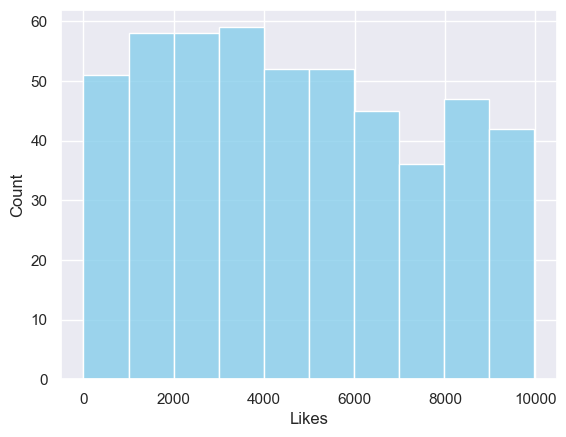

In [13]:
sns.histplot(df['Likes'], color ='skyblue', alpha =0.8)
plt.show()


Now, create a boxplot with the x axis as ‘Category’, and the y axis as ‘Likes’. 

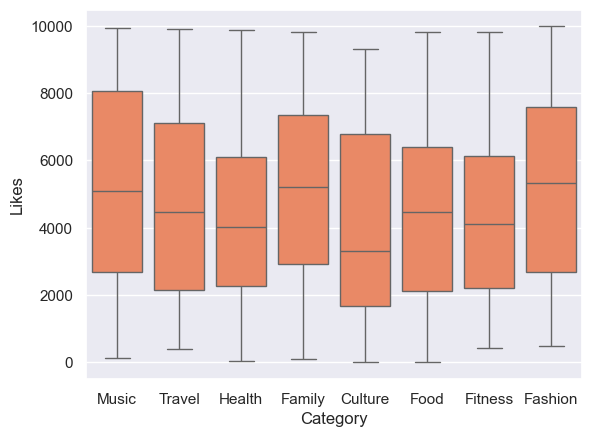

In [14]:
sns.boxplot(x ='Category', y ='Likes', data =df, color ='coral')
plt.show()

Now perform some statistics on the data. First, print out the mean of the ‘Likes’ catregory.

In [15]:
avg_Likes = df['Likes'].astype('float').mean(axis =0)
print("Average Likes: ", avg_Likes)

Average Likes:  4665.59


Next, use the dataframe’s groupby method to print out the mean of each Category ‘Likes’ 

In [16]:
df_gptest = df[['Likes', 'Category']]
gp_test = df_gptest.groupby(['Category'], as_index=False).mean()
gp_test

,Category,Likes
0,Culture,3981.303030
1,Family,5130.093750
2,Fashion,5131.120000
3,Fitness,4442.500000
4,Food,4429.433735
5,Health,4418.000000
6,Music,5349.490909
7,Travel,4735.589286


Let's perform some calculataions and OLS.

In [17]:
import statsmodels.api as sm
from scipy import stats

### `Shares vs Likes`

In [18]:
df[['Shares', 'Likes']].corr()

,Shares,Likes
Shares,1.000000,-0.009864
Likes,-0.009864,1.000000


In [19]:
pearson_coef , p_value = stats.pearsonr(df['Likes'], df['Shares'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.009864405931256603  with a P-value of P = 0.8258492677343622


There is a slight negative correlation between Likes and Share. Lets plot the scatterplot of Likes and Shares and check the regression line. 

**Let's perform the Regression and Plot the regression line(s) on the scatter plot.**

In [34]:
y = df['Shares']
x1 = df['Likes']


In [35]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04846
Date:                Tue, 16 Jul 2024   Prob (F-statistic):              0.826
Time:                        19:03:24   Log-Likelihood:                -3201.9
No. Observations:                 500   AIC:                             6408.
Df Residuals:                     498   BIC:                             6416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        265.7012     12.653     20.999      0.000     240.841     290.562
Likes         -0.0005      0.002     -0.220      0.826      -0.005       0.004
==============================================================================
Omnibus:                      285.760   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.674
Skew:                          -0.131   Prob(JB):                     2.18e-07
Kurtosis:                       1.815   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

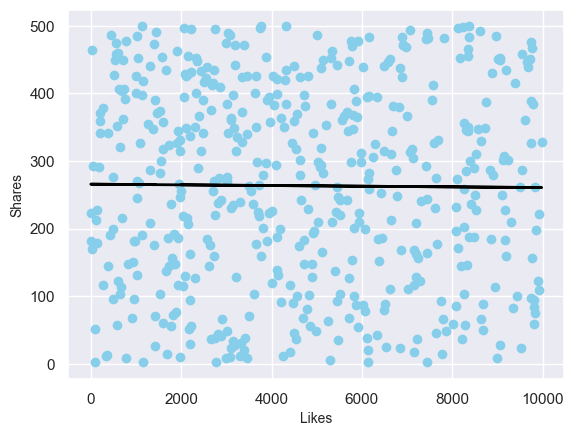

In [39]:
plt.scatter(df['Likes'], y, color ='skyblue')
yhat = 265.7012 - 0.0005*df['Likes']

fig = plt.plot(df['Likes'], yhat, lw =2, c ='black') 

plt.xlabel('Likes', fontsize =10)
plt.ylabel('Shares', fontsize =10)

plt.show()

We can see that regression line shows a slight negative trend for Likes vs Shares. So there is negative correltaion between two. 

### `Comments vs Likes`

In [20]:
df[['Comments', 'Likes']].corr()

,Comments,Likes
Comments,1.000000,0.040231
Likes,0.040231,1.000000


In [21]:
pearson_coef , p_value = stats.pearsonr(df['Likes'], df['Comments'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.040231145637580686  with a P-value of P = 0.36934142405657533


There is a positive corelation between Likes and Comments. Lets check it out with regression. We will predict number of Comments based on Likes.

In [40]:
y = df['Comments']
x1 =df['Likes']


In [41]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Comments   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8073
Date:                Tue, 16 Jul 2024   Prob (F-statistic):              0.369
Time:                        19:15:46   Log-Likelihood:                -3533.2
No. Observations:                 500   AIC:                             7070.
Df Residuals:                     498   BIC:                             7079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        483.5221     24.546     19.698      0.000     435.295     531.749
Likes          0.0040      0.005      0.899      0.369      -0.005       0.013
==============================================================================
Omnibus:                      233.382   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.820
Skew:                          -0.115   Prob(JB):                     5.52e-07
Kurtosis:                       1.846   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

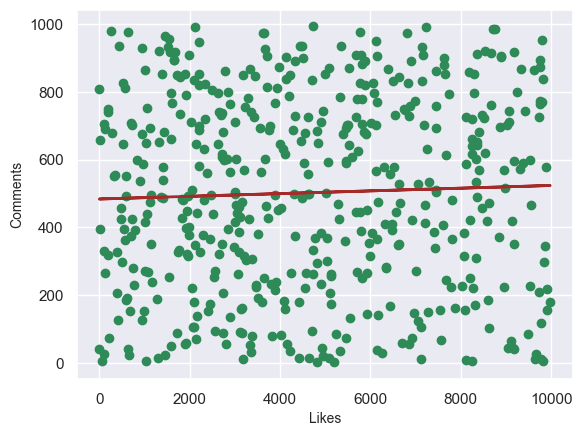

In [45]:
plt.scatter(df['Likes'], y, color ='seagreen')

yhat = 483.5221 + 0.0040 * df['Likes']

fig = plt.plot(df['Likes'], yhat, lw =2, c ='brown')

plt.xlabel('Likes', fontsize =10)
plt.ylabel('Comments', fontsize =10)

plt.show()

We see that there is a slight positive correlation between Comments and Likes. 

### `Comments vs Share`

In [22]:
df[['Comments', 'Shares']].corr()

,Comments,Shares
Comments,1.000000,0.004697
Shares,0.004697,1.000000


In [23]:
pearson_coef , p_value = stats.pearsonr(df['Shares'], df['Comments'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.004697462243559627  with a P-value of P = 0.916553452583945


There is very low positive correlation between Comments and Shares. Lets perform the regression.

We will try to predict number of shares based on comments.

In [46]:
y =df['Shares']
x1 =df['Comments']

In [47]:
x =sm.add_constant(x1)
res = sm.OLS(y,x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01099
Date:                Tue, 16 Jul 2024   Prob (F-statistic):              0.917
Time:                        19:23:45   Log-Likelihood:                -3201.9
No. Observations:                 500   AIC:                             6408.
Df Residuals:                     498   BIC:                             6416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.1024     13.318     19.680      0.000     235.935     288.270
Comments       0.0024      0.023      0.105      0.917      -0.043       0.048
==============================================================================
Omnibus:                      290.670   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.796
Skew:                          -0.131   Prob(JB):                     2.05e-07
Kurtosis:                       1.813   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

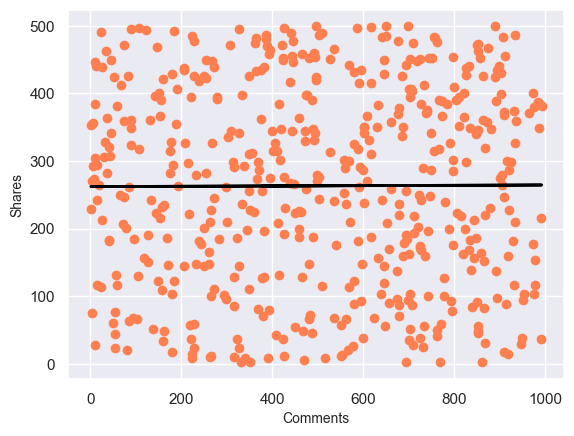

In [54]:
plt.scatter(df['Comments'], y, c ='coral')

yhat = 262.1024 + 0.0024*df['Comments']

fig = plt.plot(df['Comments'], yhat, lw =2, c= 'black')

plt.xlabel('Comments', fontsize =10)
plt.ylabel('Shares', fontsize =10)

plt.show()

The plot does not provide any meaningful insights. Number of comments do not predict the number of shares for each post. Though there is very low positive linear relationship between the two.

### Lets'consider two variables for regression.

In [57]:
df[['Likes', 'Shares', 'Comments']].corr()

,Likes,Shares,Comments
Likes,1.000000,-0.009864,0.040231
Shares,-0.009864,1.000000,0.004697
Comments,0.040231,0.004697,1.000000


In [27]:
y = df['Shares']
x1 = df[['Comments', 'Likes']]

In [28]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.03064
Date:                Tue, 16 Jul 2024   Prob (F-statistic):              0.970
Time:                        19:00:19   Log-Likelihood:                -3201.9
No. Observations:                 500   AIC:                             6410.
Df Residuals:                     497   BIC:                             6422.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        264.4304     16.894     15.652      0.000     231.237     297.624
Comments       0.0026      0.023      0.114      0.910      -0.043       0.048
Likes         -0.0005      0.002     -0.224      0.823      -0.005       0.004
==============================================================================
Omnibus:                      285.721   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.676
Skew:                          -0.132   Prob(JB):                     2.18e-07
Kurtosis:                       1.815   Cond. No.                     1.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`As we see that coef/slope remail almost the same for Comments and Likes i.e Comments: 264.4304 , Likes: 264.4299 (264.4304 -0.0005). Hence the regression line for Comments and Likes will overlap in the regression plot.`

#### Firts let's plot a scater plot with Comments and Shares (y).

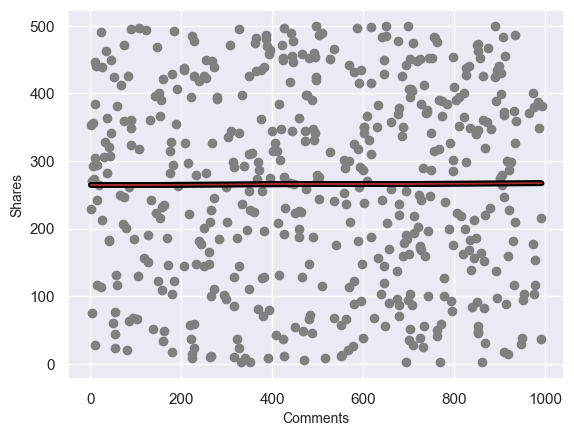

In [56]:
plt.scatter(df['Comments'], y, color ='grey')
yhat_com = 264.4304 + 0.0026*df['Comments']
yhat_Likes = 264.4299 + 0.0026*df['Comments']

fig = plt.plot(df['Comments'], yhat_com, lw =4, c ='black')
fig = plt.plot(df['Comments'], yhat_Likes, lw =1, c='brown' )

plt.xlabel('Comments', fontsize =10)
plt.ylabel('Shares', fontsize =10)

plt.show()

Now let's plot a scater plot with Likes and Shares (y). Hence the slope/coef for both Likes and Comments is almost the same, the regression lines overlap. 

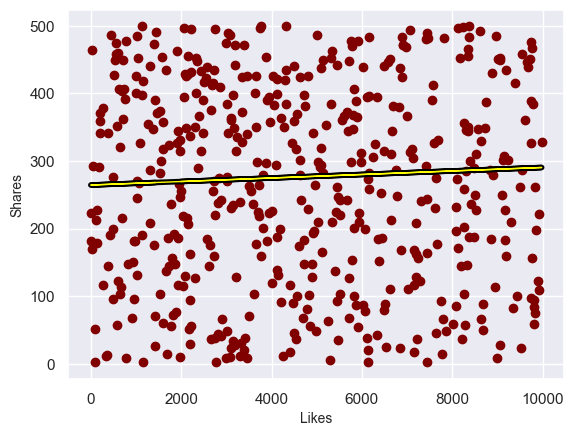

In [60]:
plt.scatter(df['Likes'], y, color ='MAROON')
yhat_com = 264.4304 + 0.0026*df['Likes']
yhat_Likes = 264.4299 + 0.0026*df['Likes']

fig = plt.plot(df['Likes'], yhat_com, lw =4, c ='black')
fig = plt.plot(df['Likes'], yhat_Likes, lw =1, c='yellow' )

plt.xlabel('Likes', fontsize =10)
plt.ylabel('Shares', fontsize =10)

plt.show()

The regression line over the scatter plot of Likes and Shares shows slight Positive correlation. 


## Conclussion:
Procedure: 

We first generated the random Twitter data for following categories : **Food, Travel, Fashion, Fitness, Music, Culture, Family, and Health.** 

Then We genrated random number of *Likes, Comments and Shares* for each Category in our Dataset.

Then we performed Data Wrangling and cleaned the dataset. 

`Key Findings:`

**1:** As the data is randomly generated, there were no missing or duplicate values.

**2:** Maximum Tweets are from Food category followed by Health and Culture.

**3:** From Histplot of Likes We find that: About 45 Tweets have 9000-10000 Likes while about 50 Tweets have less than 1000 Likes. Number of Likes remain overlapped for most tweets.

**3:** From Boxplot of variables Category and Likes we find that: Music category have highest number of Likes followed by Fashion and Family. Again the number of Likes for each category remain overlapped.

**4:** Average Likes per tweet is : **4665**

**5:** Average Likes for `Music` category is highest i.e. 5350, followed by `Fashion` i.e. 5131, while `Culture` category recieved least average likes i.e. 3981.


`Key Findings from Regression Analysis`

> There is a slight negative correlation between Likes and Share.

> There is a positive corelation between Likes and Comments.

> There is very low positive correlation between Comments and Shares.

Then we used two variables for regression: Likes and Comments for predicting the Number of Shares. 

The regression line over the scatter plot of Likes and Shares showed slight Positive correlation. Higher the number of Likes and Comments for a Tweet, higher the number of Shares It is expected to recieve and that makes sense. 


## Recommendations to the stakeholders:

**1.** There are (66) Tweets from Category **Culture** which is higher than the number of tweets for the categories **Music** (55) and **Fashion**(50). Inspite of that Average Likes are least for the Culture category while Music and Fashion recived highest number of Likes.

The company needs to promote "Culture" related content on their platform to keep their users engaged. 

**2.** Category **Food** has highest number of Tweets (83) yet the average number of Likes for this category are among bottom three. It implies that people tweet more about Food. The company may recommend more Food based Tweets to its customers to generate more Likes on the post. 

**3** From Regression with **Likes** and **Comments** as independent variables and **Shares** as dependent variable, we found that tweets with higher number of likes and comments tends to have more number of shares or vice versa. 
Hense the company may suggest the tweets with more Likes to its customers. It will increase the user engagement and help the company retaining its customers.

